In [1]:
import os
path = 'C:\\Users\\ai598\\Thesis\\Navigation_Learning_Engine'
os.chdir(path)
import NavigationTrajectory as nt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DataGenPrep as dgp
import json 

Created navigation trajectory object


* Generate random data/points with defined boundary conditions for x coordinate
* Scale the data using min-max normalization
* For static obstacle model, separate dataset into input set (Vix,Viy,Vgx,Vgy,Ox,Oy) and Target set(M1x,M1y,M2x,M2y)
* Generate trajectory using input and target
* Filter trajectory to find good trajectory for a given threshold
* Generate specefic numbers/population of data with a given thresohld

In [2]:
dgp  = dgp.DataGenPrep()
nt = nt.NavigationTrajectory()

DataGenPrep instance created
Created navigation trajectory object


#### Define Range

In [3]:
BcRange = {
    
    "VI"   : [18,190],
    
    "VM1"  : [300,500],
    
    "VM2"  : [501,700],
    
    "VG"   : [801,999],
    
    "OI"   : [0,999],
    
    "OM1"  : [300,500],
    
    "OM2"  : [501,700],
    
    "OG"   : [701,799]
}

# Convert and write JSON object to file
with open("DataFiles\BcRange.json", "w") as outfile: 
    json.dump(BcRange, outfile)
    
# create column array and save as text file
datacolumns = np.array(["VIX1","VIX2", "VM1X1","VM1X2","VM2X1","VM2X2","VGX1","VGX2","OIX1","OIX2","OM1X1","OM1X2","OM2X1","OM2X2","OGX1","OGX2"])
np.savetxt('DataFiles\DataFrameCol.txt', datacolumns, delimiter=" ", fmt="%s") 

In [5]:
# open json file data as dict
with open('DataFiles\BcRange.json') as json_file:
    data = json.load(json_file)

# parse dict to numpy array
myarray = dgp.ParseDict2Num(data)
# open text file as numpy array wits stirngs of col name
datacolumns = np.loadtxt("DataFiles\DataFrameCol.txt", dtype=str) 

#### Generate Good Input/Target/plot

In [6]:
# generate good input and target
goodinp, goodtar = dgp.RandomGoodDataGenerator(myarray,5000, Threshold= 0.6,  parts = 100,  datapoint = 10 ) 

In [32]:
dataset = pd.DataFrame({'VIX': goodinp[:, 0], 'VIY': goodinp[:, 1],'VGX': goodinp[:, 2], 'VGY': goodinp[:, 3],'OIX': goodinp[:, 4], 'OIY': goodinp[:, 5]})
dataset.to_csv('DataFiles\goodinp_0.6.csv', index=False)  

In [33]:
dataset_tar = pd.DataFrame({'VM1X': goodtar[:, 0], 'VM1Y': goodtar[:, 1],'VM2X': goodtar[:, 2], 'VM2Y': goodtar[:, 3]})
dataset_tar.to_csv('DataFiles\goodtar_0.6.csv', index=False) 

#### Test

count: 0
index: 1


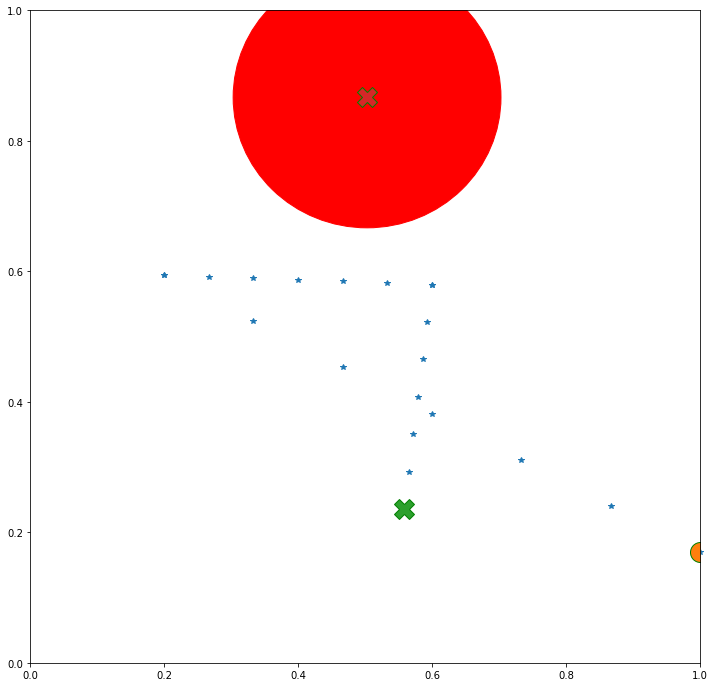

In [23]:
# test
ind= np.random.randint(0,10)
th = .2
Vmove = nt.Gen_MoveC2(goodinp,goodtar,ind,parts=6)
Opos  = goodinp[ind,[4,5]]
nt.HitCheckPlot(Opos[0],Opos[1],th,Vmove)
count = nt.StaticCheckBad(Vmove,Opos,th)
print("count:",count)
print("index:",ind)

#### Data Visualization

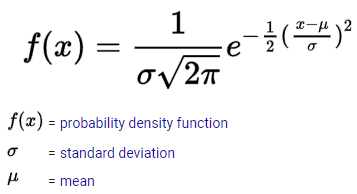

In [ ]:
# Genrates random data
RandomData = dgp.Data_Array(myarray,100)
# scale random data with min-max
sc_data = dgp.Scale_Data(RandomData) 
# Gaussian Distribution plot of all 16 data features
dgp.GaussDistPlot(sc_data,datacolumns)

### Modified Dataset

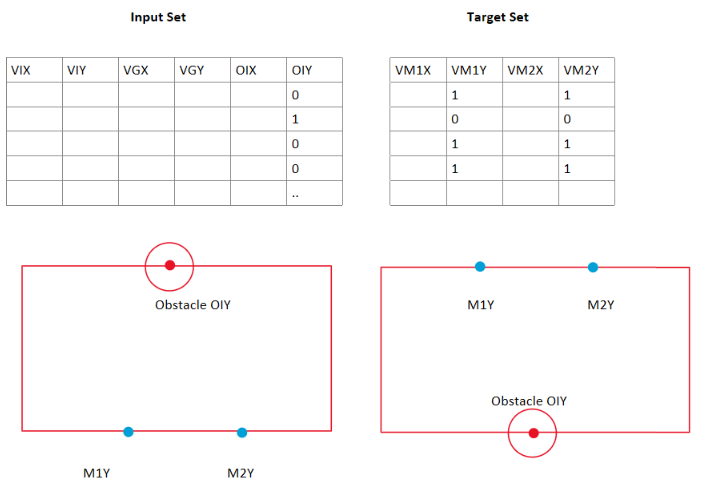

**Modify Current Dataset**:

> import current 0.6 threshold dataset

> Change input column $OIY$ Value
>> If $X_{i}\geq0.5 \ then \ X_{i} = 1$

>> Else $X_{i} = 0$

>> $X_{i} \in \ OIY$

> Change target column $VM1Y$ and $VM2Y$ Value
>> Let $X_{i} \in \ OIY$

>> $Y_{i} \in \ VM1Y$

>> $Z_{i} \in \ VM2Y$

>> If $X_{i} = 0$ then $Y_{i} = 1$ and $Z_{i} = 1$

>> Else $Y_{i} = 0$ and $Z_{i} = 0$

    



In [29]:
def ReplaceOIYByCond(x):
    if(x >= 0.5):
        return 1
    else:
        return 0
def ReplaceVMYByCond(x):
    if(x==0):
        return 1
    else:
        return 0

def ReplaceOIYByCol(df):
    i = 0
    maxlen = len(df['OIY'])
    while(i<maxlen):
        df['OIY'].iloc[i] = ReplaceOIYByCond(df['OIY'].iloc[i])
        i=i+1
    return df

def ReplaceVMYByCol(df1,df2):
    """
    Input:
        
        df1: Input dataset
        df2: target dataset
    
    Return:
            
        Target Dataset of repalced values 
        
    """
    
    i = 0
    maxlen = len(df1['OIY'])
    
    while(i<maxlen):
        df2['VM1Y'].iloc[i] = ReplaceVMYByCond(df1['OIY'].iloc[i])
        df2['VM2Y'].iloc[i] = ReplaceVMYByCond(df1['OIY'].iloc[i])
        i = i+1
        
    return df2         
    
    

In [30]:
df_good_inp = pd.read_csv('DataFiles\goodinp_0.6.csv')  # import data
df_good_target = pd.read_csv('DataFiles\goodtar_0.6.csv')  # import data

In [34]:
df1 = df_good_inp
df2 = df_good_target

df1 = ReplaceOIYByCol(df1)

df2 = ReplaceVMYByCol(df1,df2)


In [36]:
df2.head()

,VM1X,VM1Y,VM2X,VM2Y
0,0.712500,1.0,0.102703,1.0
1,0.892045,0.0,0.886792,0.0
2,0.293706,1.0,0.983240,1.0
3,0.958763,1.0,1.000000,1.0
4,1.000000,1.0,0.805714,1.0


In [37]:
df1.head()

,VIX,VIY,VGX,VGY,OIX,OIY
0,0.948718,0.953576,0.000000,0.471215,1.000000,0.0
1,0.473333,0.000000,0.785714,0.752358,0.000000,1.0
2,0.000000,0.497027,1.000000,0.707911,0.929785,0.0
3,0.767296,0.237470,1.000000,1.000000,0.000000,0.0
4,0.000000,0.904818,0.609756,0.540712,0.204265,0.0


In [38]:
df1.to_csv('DataFiles\Modified_Inp_0.6.csv', index=False)  
df2.to_csv('DataFiles\Modified_Tar_0.6.csv', index=False)  